In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = (30,15)

In [ ]:
df = pd.read_csv('/content/attacks.csv',encoding='latin-1')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df)

25614

In [ ]:
df = df.dropna(how = 'all')
len(df)

6096

## **Make a graph of number of shark attacks annually over time since 1900. What trends do you see?**

Text(0, 0.5, '# of Attacks')

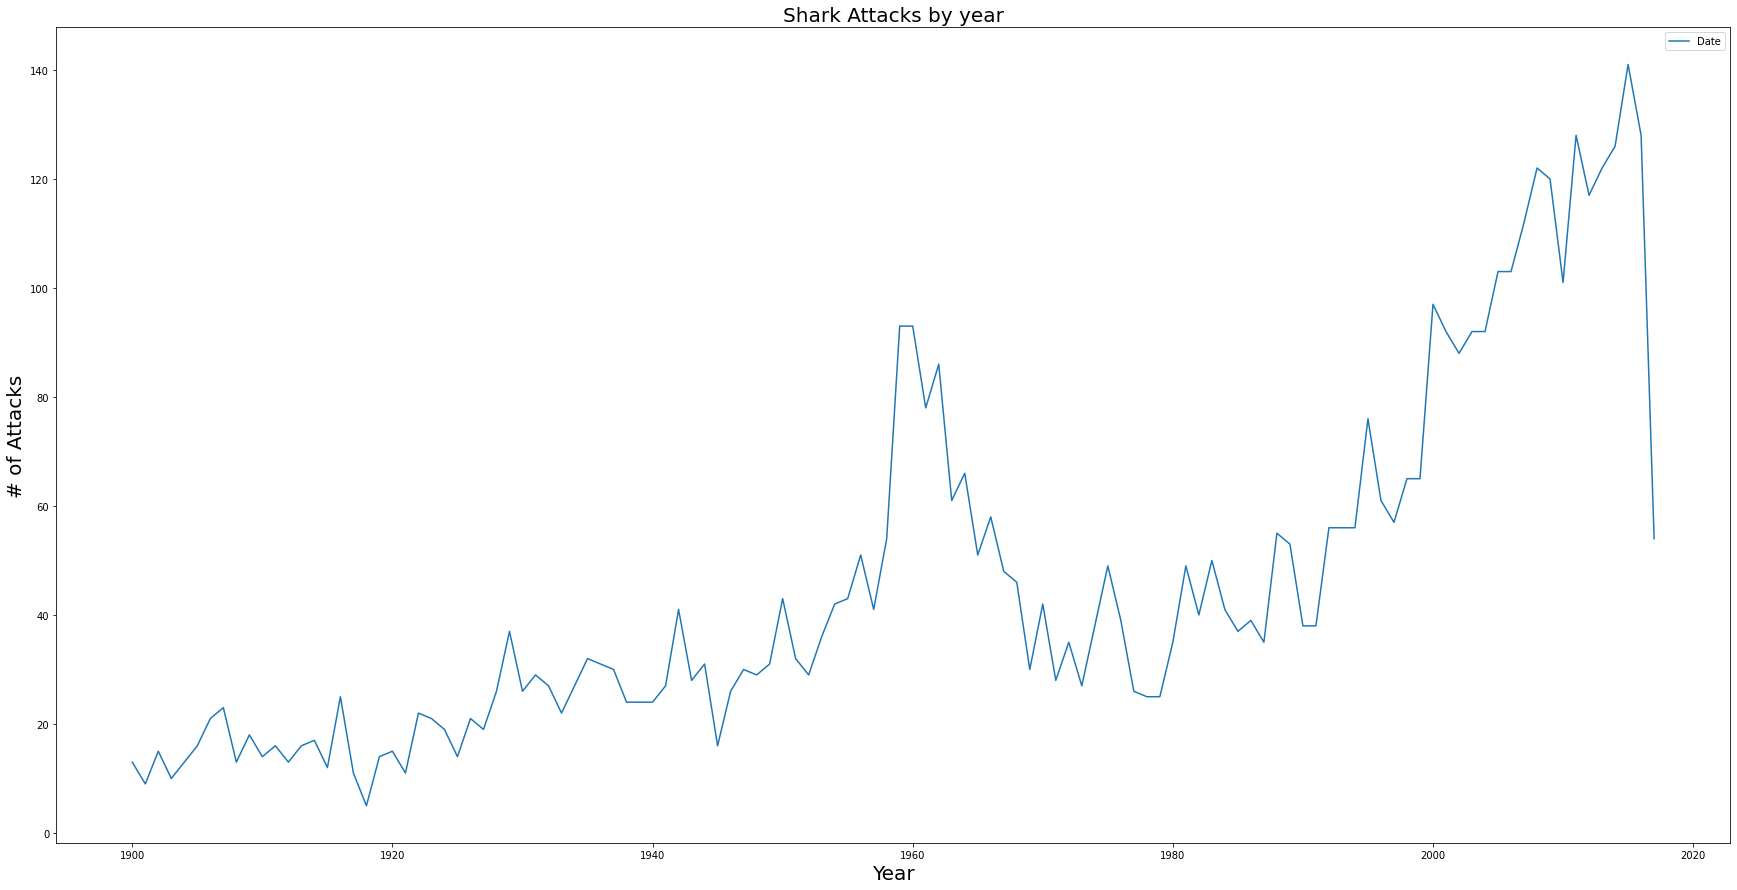

In [ ]:
df[df['Year'] > 1899][['Year','Date']].groupby('Year').count().plot.line(figsize = x)
plt.rcParams.update({'font.size': 20})
plt.title('Shark Attacks by year', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('# of Attacks', fontsize=20)


There has been a steady increase in the number of shark attacks by year since the 1900s. Surprisingly, there was a peak in shark attacks around the year 1960. Then there was a decline in attacks until the shark attack rate increased again. This could be due to human encroachment on shark environments, climate change, more people know how to swim and swim more often giving sharks more opportunities to attack.

Side note, the release of Jaws(1975)([imdb.com](https://www.imdb.com/title/tt0073195/)) could have been inspired by the recent increase in shark attacks, and the subsequent fall could have been a result of people who had seen the movie being afraid to go into the water for fear of shark attack.

## **Which countries report the most shark attacks? Within those countries, which areas and locations seem to be the most dangerous?**



In [ ]:
df[['Country',	'Activity']].groupby(['Country']).count().sort_values('Activity', ascending = False).head(7)

,Activity
Country,
USA,2031
AUSTRALIA,1182
SOUTH AFRICA,527
NEW ZEALAND,118
PAPUA NEW GUINEA,111
BAHAMAS,96
BRAZIL,94


In [ ]:
df[['Country',	'Area',	'Activity']].groupby(['Country',	'Area']).count().sort_values('Activity', ascending = False).head(7)

Activity
Country      Area                           
USA          Florida                     953
AUSTRALIA    New South Wales             433
USA          Hawaii                      276
AUSTRALIA    Queensland                  271
USA          California                  269
SOUTH AFRICA KwaZulu-Natal               190
             Western Cape Province       178

In [ ]:
df[['Country',	'Area',	'Location',	'Activity']].groupby(['Country',	'Area',	'Location']).count().sort_values('Activity', ascending = False).head(11)

Activity
Country      Area                  Location                                               
USA          Florida               New Smyrna Beach, Volusia County                    157
                                   Daytona Beach, Volusia County                        28
                                   Melbourne Beach, Brevard County                      18
                                   Ponce Inlet, Volusia County                          18
             South Carolina        Myrtle Beach, Horry County                           13
BRAZIL       Pernambuco            Boa Viagem, Recife                                   13
USA          South Carolina        Isle of Palms, Charleston County                     13
             Florida               Cocoa Beach, Brevard County                          12
                                   Ponce Inlet, New Smyrna Beach, Volusia County        12
                                   Palm Beach, Palm Beach County                        11
SOUTH AFRICA Western Cape Province Mossel Bay                                           11

The USA has the most shark attacks in the world, followed by Austrailia. According to this dataset, Florida is the hottest shark attack location in the world. With around 1000 recorded shark attacks it outranks any other location!

## What body parts are most often injured?

In [ ]:
s = df['Injury'].str.replace(r'[^\w\s]+', '', regex = True).str.lower()
texts = s.str.split().apply(pd.Series).stack().reset_index(drop = True)
text = " ".join(i for i in texts)


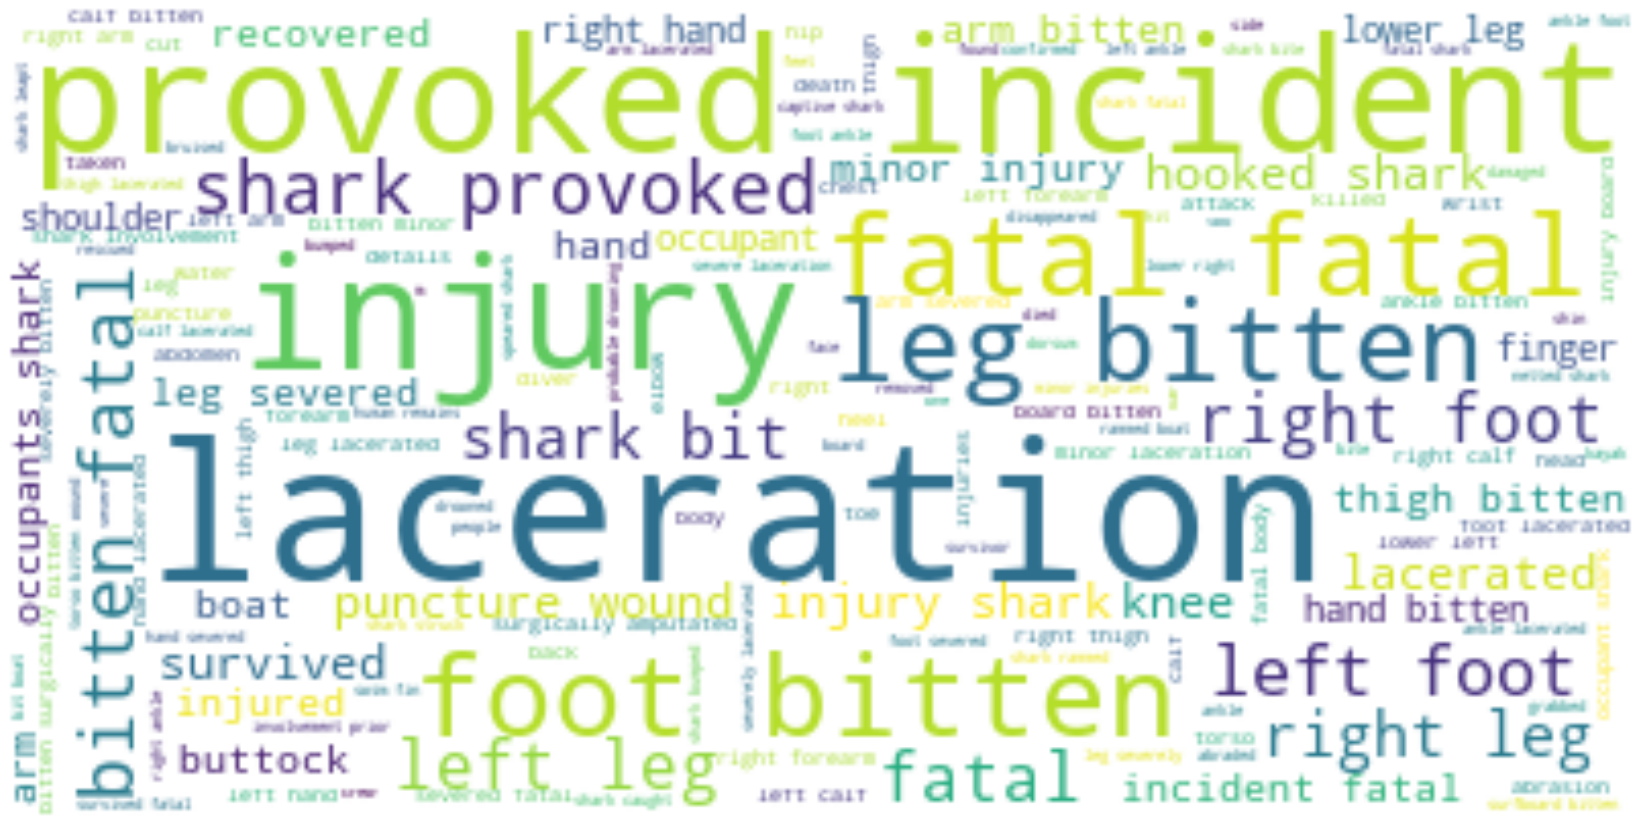

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize = x)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The size of the word is proportional to the frequency of the word appearing in the injury section of the dataset. The size of foot and leg apears to be the most common injury obtained by the sharks. This makes sense because typically, legs and feet are the lowest hanging body parts in the water.

## **Are shark attacks more common during certain parts of the day?**

In [ ]:
wtf = df.Time.dropna().str.findall(r'\d+h\d\d').apply(pd.Series).stack().reset_index(drop=False).drop('level_1', axis = 1).set_index('level_0')[0].str.replace('h',':')

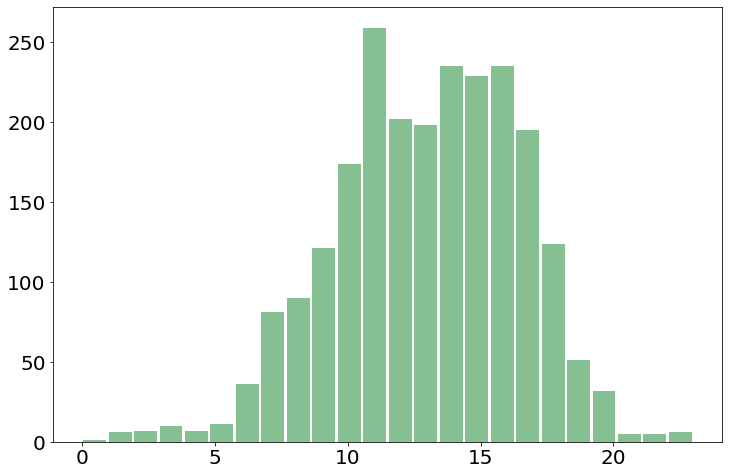

In [ ]:
a = wtf.str.slice(stop = 2).replace('9:', '09').astype(int).sort_values(ascending = True)#.plot.hist(figsize = x, bins = 24, xticks = range(24))
# Adjust the border color
ax = a.hist(bins=24, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


According to the histogram, the most common hour of shark attack is around midday. With 11 am being the most popular. Then between the times of 2 and 4 attacks increase again. The dip could possibly be due to luntime hours and people exit the water to eat lunch.

## What First name is most likely to get attacked by a shark

In [ ]:
df[['Name', 'Date']].groupby('Name').count().sort_values('Date', ascending = False).head(30)
name = pd.DataFrame({'first name':df.Name.str.split().str[0], 'num':np.ones(len(df.Name.str.split().str[0]))})
name.groupby('first name').count().sort_values('num', ascending = False).head(10)

,num
first name,
male,520
John,133
a,118
female,91
William,76
Robert,73
Mr.,62
James,60
David,58


According to the messy dataset, the most common name to be attacked by a shark is John. Due to how common this name is, it makes sense that John is very likely to be attacked by a shark

## **Which species of shark are attacking most often?**

In [ ]:
df['Species ']

0                         White shark, 4 m
1                             7 gill shark
2                                      NaN
3        3m shark, probably a smooth hound
4                                 8' shark
                       ...                
6091                                   NaN
6092                                   NaN
6093                                   NaN
6101                                     N
25613                                  NaN
Name: Species , Length: 6096, dtype: object

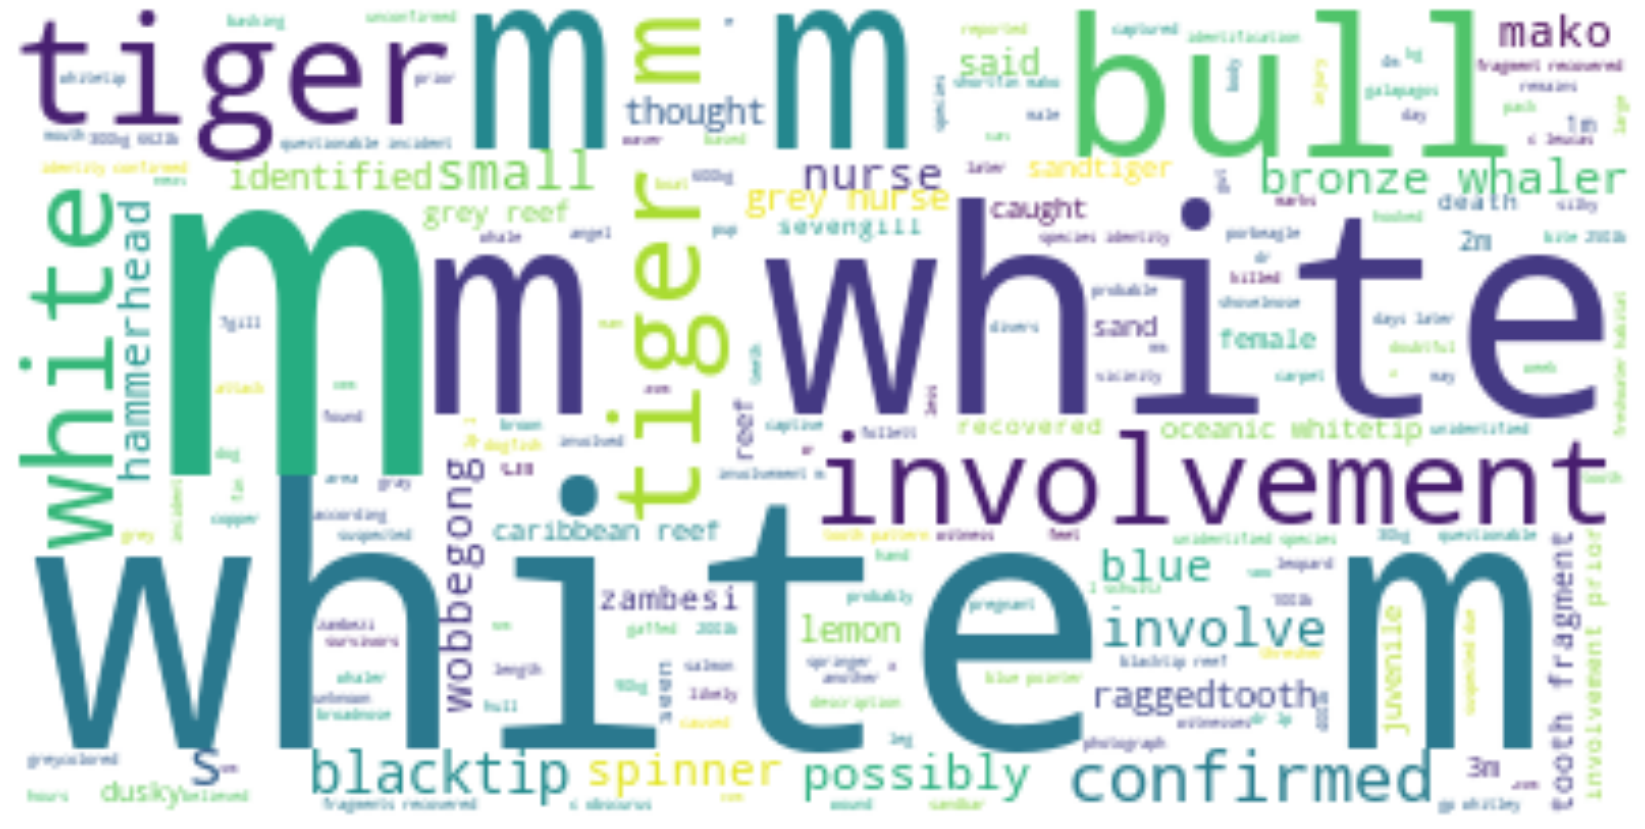

In [ ]:
s = df['Species '].str.replace(r'[^\w\s]+', '', regex = True).str.lower().str.replace('shark', '')
texts = s.str.split().apply(pd.Series).stack().reset_index(drop = True)
text = " ".join(i for i in texts)
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize = x)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

According to the word cloud, the most common shark type is a great white shark. Other notable sharks on this cloud looks like tiger and bull sharks.

## **What is the percentage of fatalities of shark attacks? What is the trend of fatal shark attacks over time?**

In [ ]:
print('{}% of shark attacks are fatal of all time'.format((round(sum(df['Fatal (Y/N)'] == 'Y')/len(df), 3)*100)) )


25.7% of shark attacks are fatal of all time


In [ ]:
df['fatal'] = df['Fatal (Y/N)'] == 'Y'
trend = df[df['Year'] > 1900][['Year', 'fatal']].groupby('Year').agg({'fatal':['sum', 'count']})
#trend.rename(('fatal',   'sum'), 'total fatalities')#({'('fatal',   'sum')': 'total fatalities', ('fatal', 'count'): 'total attacks'}
trend.columns = ['total fatalities', 'total attacks']

<ipython-input-19-ae82de6dde2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatal'] = df['Fatal (Y/N)'] == 'Y'


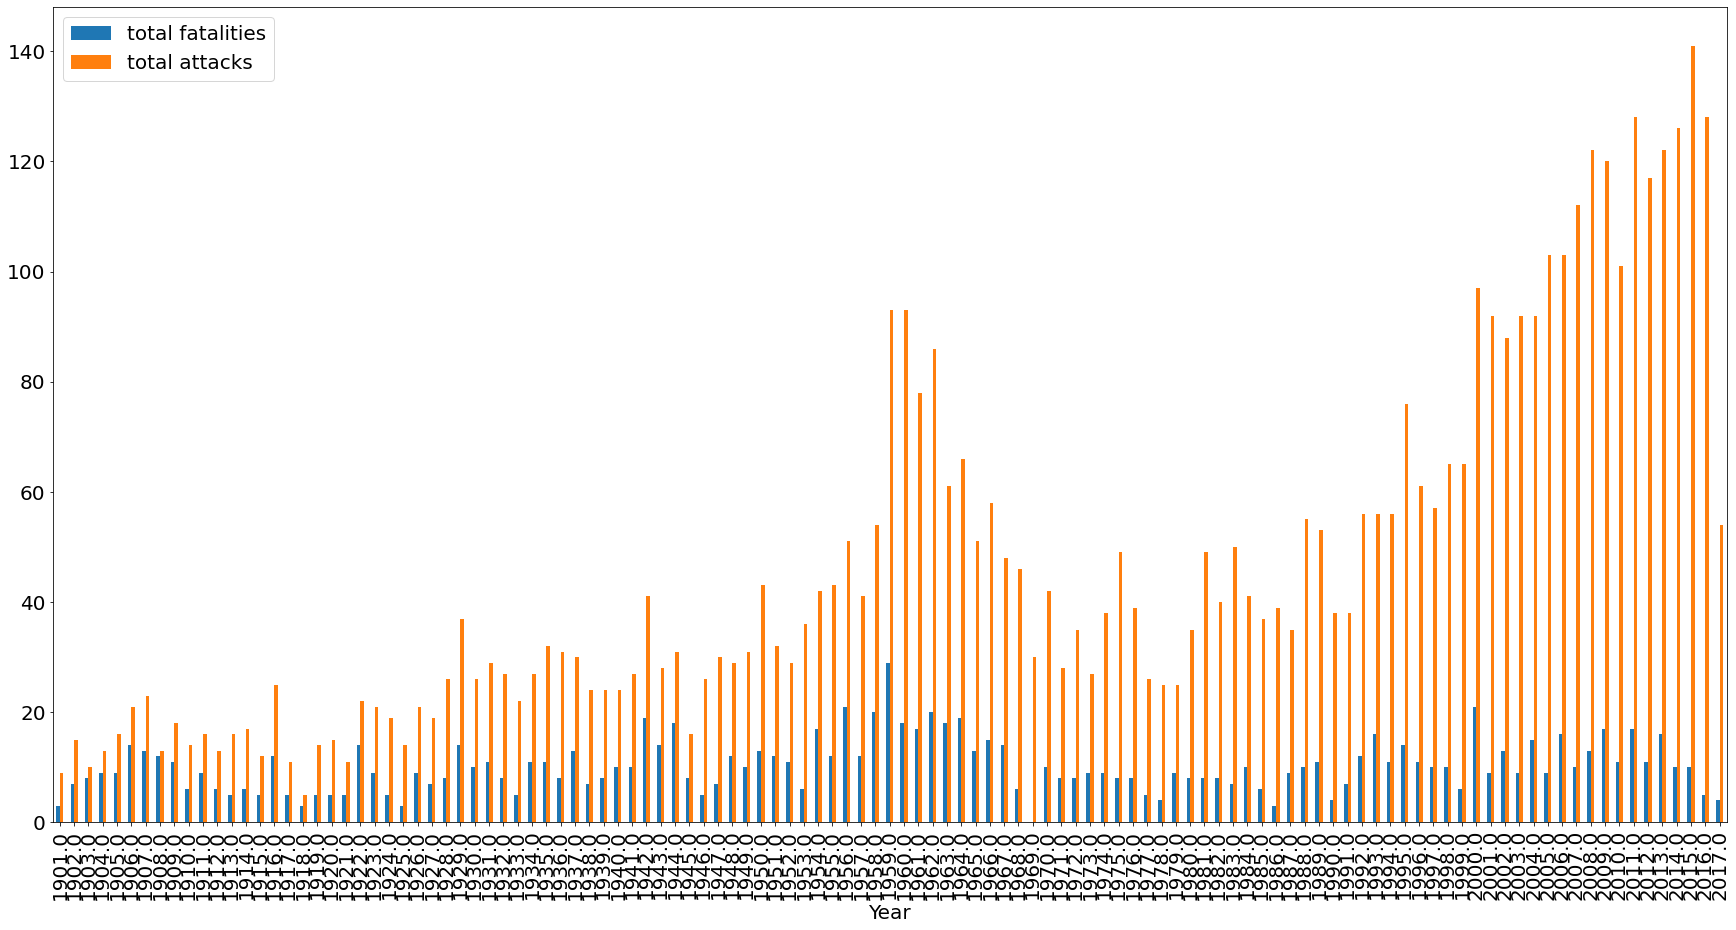

In [ ]:
trend.plot.bar(figsize = x)

The plot shows that in the past 100+ years that the number of attacks have gone up but the number of fatalities has remained essentially the same. There are many fluctuations in the number of fatalities and the attacks but the data shows that fatalities are relatively steady